# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Общая информация: 

In [1]:
# Загрузил библиотеку Pandas. Сохраним базу данных в переменной data и вывел первые 5 строк датафрейма:
import pandas as pd
data = pd.read_csv('/datasets/real_estate_data.csv')
data.head()

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


In [2]:
# Данные в датафрейме слились. Указал, в качестве разделителя, знак табуляции \t. Затем еще раз вывел первые 5 строк:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
# Вывел атрибуты датафрейма:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
# Числовое описание значений каждого столбца датафрейма:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


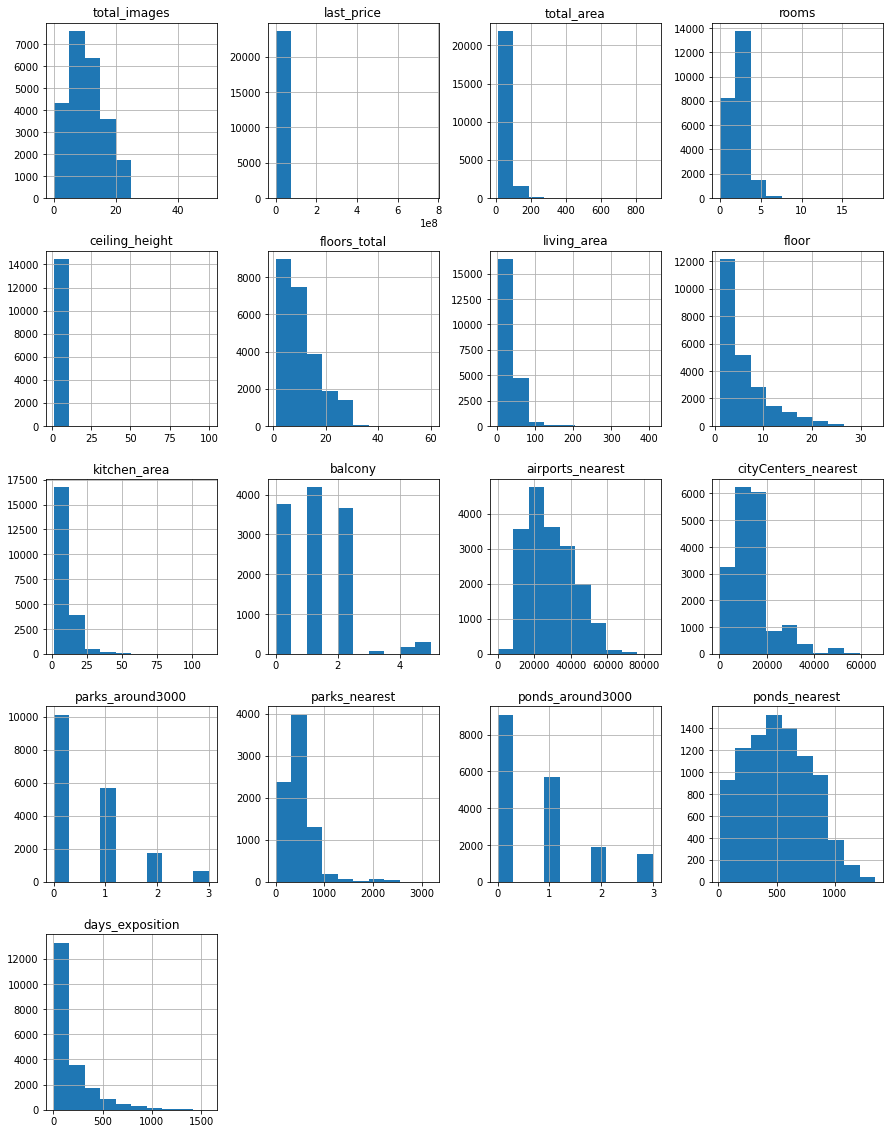

In [5]:
# Гистограммы по каждому столбцу датафрейма:
import matplotlib.pyplot as plt
data.hist(figsize=(15, 20))
plt.show()

**Вывод:**
Всего в датафрейме 23699 строки, в нескольких столбцах обнаружены пропуски и аномалии.
Дублирующих строк не выявлено.

### Предобработка данных:

In [6]:
# Количетво пропусков в каждом столбце датафрейма:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [7]:
# Заменил пропуски в столбце со статусом помещения на False, т.к. в связи со спецификой юридического оформления апартаментов, продавцы должны указывать это в объявлении.
data['is_apartment'] = data['is_apartment'].fillna(False)

# Поменял пропуски в столбцах, где логично предположить что отсутствие данных означает отсутствие рассматриваемого параметра/фактора в разрезе конкретного объекта недвижимости.
data['balcony'] = data['balcony'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

Также была рассмотрена возможность замены на ноль столбцов с расстоянием до ближайших объектов (таких как пруд, парк, аэропорт, центр города), однако от этой идеи решено было отказаться, т.к. замена на ноль будет восприниматься, как нахождение данных объектов недвижимости в непосредственной близости к парку, пруду и т.д.

Остальные пропуски на данном этапе заменять не имеет смысла, т.к. логичную замену предположить затруднительно.

Среди возможных причин, которые привели к пропускам, могут быть:
* во-первых, человеческий фактор (например, пользователь элементарно не внес информацию по конкретному параметру в объявлении)
* во-вторых, машинный фактор (например, не все парки и озера могут быть обозначены в системе, а значит не могут быть определены автоматически и привязаны к конкретному объекту недвижимости по территориальному принципу)

In [8]:
# Изменил тип данных с вещественных на целочисленные:
data['last_price'] = data['last_price'].astype('int32')
data['balcony'] = data['balcony'].astype('int32')
data['parks_around3000'] = data['parks_around3000'].astype('int32')
data['ponds_around3000'] = data['ponds_around3000'].astype('int32')

# Перевел дату в формат без времени, т.к. у всех объявлений оно стоит стандартное 00:00
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')

В выбранных столбцах был изменен тип значений по следующим причинам:

* Из вещественного в целочисленные - переведены столбцы, значения в которых нельзя разделить на дробные части.
* изменен формат даты, т.к. объявление не привязывалось ко времени размещения, только к дате.

In [9]:
# Проверил датафрейм на уникальные названия населенных пунктов
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [10]:
# Удалил из названий населенных пунктов их тип, исключив тем самым неявные дубликаты:
types = ['посёлок ', 'поселок ', 'деревня ', 'городского ', 'типа ', 'садовое товарищество ', 'городской ', 'станции ', 'село ', 'садоводческое ', 'некоммерческое ', 'товарищество ', 'садовое ', 'при железнодорожной станции ', 'коттеджный ', 'при железнодорожной']

for type in types:
    data['locality_name'] = data['locality_name'].str.replace(type, '')
    
# Проверил датафрейм на уникальные названия населенных пунктов еще раз:
data['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодёжное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

В столбце locality_name названия населенных пунктов были приведены к единому виду путем отсеивания типа населенного пункта.

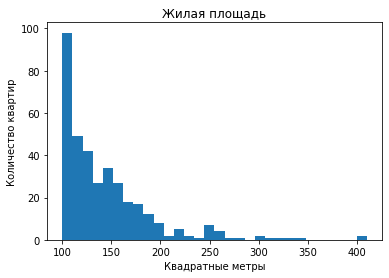

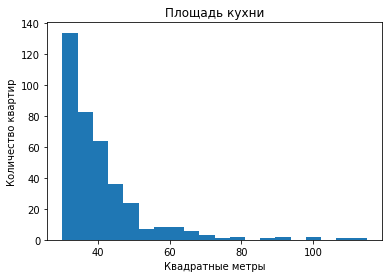

In [11]:
# Построил гистограмму по столбцу living_area:
plt.hist(data['living_area'], bins=30, range=(100, 410))
plt.title('Жилая площадь')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

# Построил гистограмму по столбцу kitchen_area:
plt.hist(data['kitchen_area'], bins=20, range=(30, 115))
plt.title('Площадь кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

In [12]:
# Удалил строки с выбивающимися значениями жилой площади и площади кухни:
data=data.query('living_area <= 200')
data=data.query('kitchen_area <= 50')

# Посчитал медианные коэффициенты жилой и кухонной площади, на основе которых высчитаем жилую и кухонную площадь для каждой строки с пропущенными значениями:
living_coefficient = data['living_area'].median() / data['total_area'].median()
kitchen_coefficient = data['kitchen_area'].median() / data['total_area'].median()
data['living_area'].fillna(data['total_area'] * living_coefficient, inplace=True)
data['kitchen_area'].fillna(data['total_area'] * kitchen_coefficient, inplace=True)

In [13]:
# Привел высоту потолков, ошибочно записанную в сантиметрах к размеру в метрах, заполним пропуски медианным значением по столбцу и удалим строки в которых потолки ниже 2 метров и выше 10 метров:
data['ceiling_height'] = data['ceiling_height'].where(data['ceiling_height'] < 25.0, data['ceiling_height']/10)
data['ceiling_height'] = data.groupby(['locality_name', 'floors_total'])['ceiling_height'].apply(lambda x: x.fillna(x.median()))
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)
data = data[(data['ceiling_height'] >= 2.0) & (data['ceiling_height'] <= 10.0)]

# Удалил из датафрейма строки, в которых отсутствует название населенного пункта и этажность здания (49 и 36 строк, соответственно):
data.dropna(subset=['locality_name'], inplace=True)
data.dropna(subset=['floors_total'], inplace=True)

# Перевел значения столбца floors_total в целочисленный тип:
data['floors_total'] = data['floors_total'].astype('int32')

# Перевел значения столбца is_apartment в булев тип:
data['is_apartment'] = data['is_apartment'].astype(bool)

# В датафрейме есть строки, в которых значение столбца rooms равняется нулю, что не может быть правдой. Удалил такие строки:
data = data[(data['rooms'] > 0) & (data['rooms'] < 10)]

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

Согласен, нужно было проверить на графике. 
* Теперь же решил ограничить жилую площадь - не более 200 кв. метров
* Площадь кухни - не более 50 кв. метров

И на основании новой выборки, заполнить рассчитать коэффициенты по медианным значениям.

In [14]:
# Проверил датафрейма на количество строк-дубликатов
data.duplicated().sum()

0

In [15]:
# Повторно проверил датафрейм на наличие пропусков в столбцах:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         4660
cityCenters_nearest      4641
parks_around3000            0
parks_nearest           13637
ponds_around3000            0
ponds_nearest           12815
days_exposition          2871
dtype: int64

In [16]:
# Еще раз вывел аттрибуты датафрейми, после обработки:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20825 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20825 non-null  int64         
 1   last_price            20825 non-null  int32         
 2   total_area            20825 non-null  float64       
 3   first_day_exposition  20825 non-null  datetime64[ns]
 4   rooms                 20825 non-null  int64         
 5   ceiling_height        20825 non-null  float64       
 6   floors_total          20825 non-null  int32         
 7   living_area           20825 non-null  float64       
 8   floor                 20825 non-null  int64         
 9   is_apartment          20825 non-null  bool          
 10  studio                20825 non-null  bool          
 11  open_plan             20825 non-null  bool          
 12  kitchen_area          20825 non-null  float64       
 13  balcony         

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'first_day_exposition'}>],
       [<AxesSubplot:title={'center':'rooms'}>,
        <AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>],
       [<AxesSubplot:title={'center':'floor'}>,
        <AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>],
       [<AxesSubplot:title={'center':'cityCenters_nearest'}>,
        <AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>],
       [<AxesSubplot:title={'center':'ponds_nearest'}>,
        <AxesSubplot:title={'center':'days_exposition'

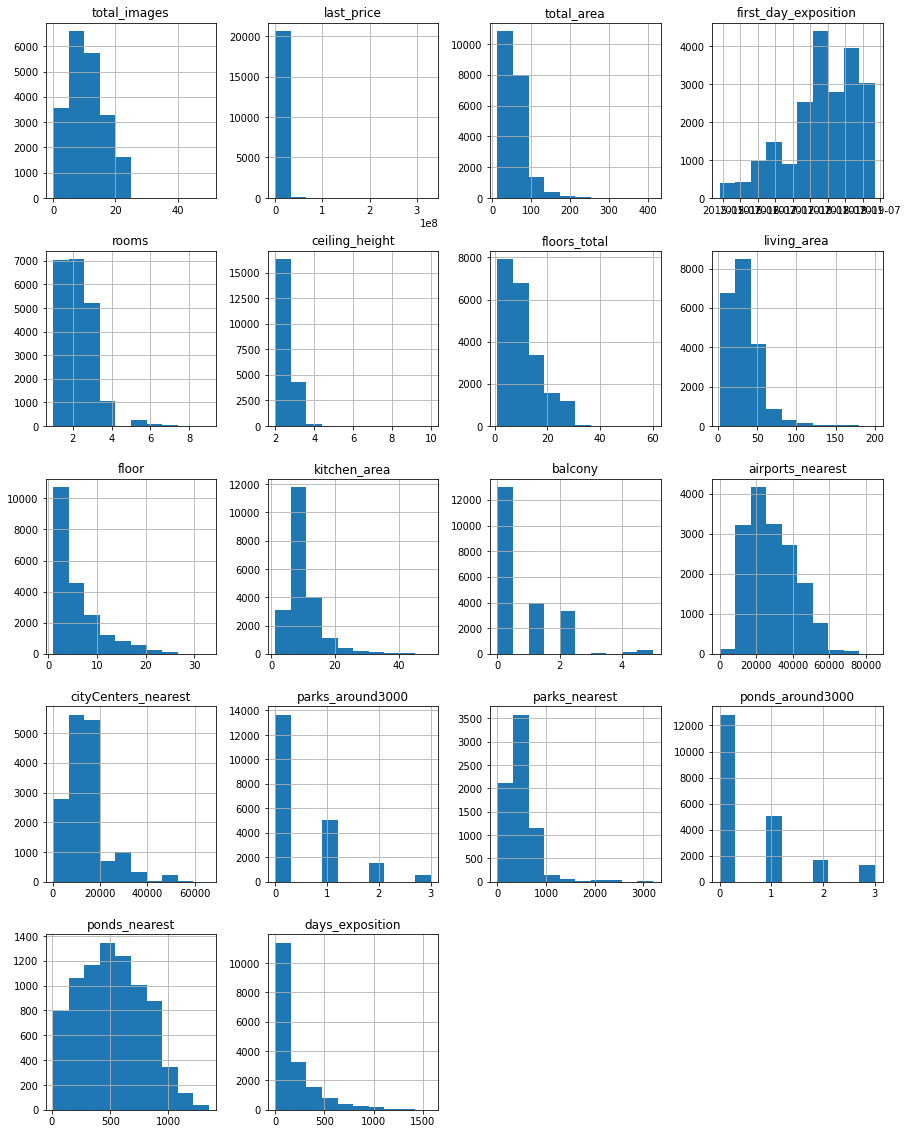

In [17]:
data.hist(figsize=(15, 20))

**Выводы:**

В ходе предобработки данных были обнаружены и обработаны пропуски и аномалии исходного датафрейма.

В частности были обнаружены следующие особенности: 
* В столбце is_apartment были обнаружены пропуски в 20924 строках. из оставшихся 2775 строк лишь 49 имело значение True. Главным образом это связано с тем, что данный тип недвижимости начал активно распространяться относительно недавно, плюс имеет ряд особенностей при юридическом оформлении. Поэтому было принято решение заменить пропуски  данном столбце нулями. 
* Не указанное количество балконов в столбце balcony будем рассатривать как их отсутствие. Впрочем как и отстутствие информации о парках и прудах в радиусе 3000 метров. Заполним пропуски в этих столбцах нулями.
* Пропуски в столбцах с расстоянием до ближайших объектов (парков - parks_nearest, прудов - ponds_nearest, аэропортов - airports_nearest, центра города - cityCenters_nearest) оставим как есть, т.к. если заполнить их нулями, то получим ситуацию, когда объект недвижимости расположен прямо у рассматриваемого объекта. А логичную замену предложить не возможно.
* Также было выявлено, что в дате размещения объявления не учитывалось время. В связи с этим дата была переведена в формат: "%Y-%m-%d".
* Логично было предположить, что пропуски в столбце days_exposition связаны с тем, что объявления были размещены менее суток. Возможно продавцу повезло и продажа недвижимости прошла в день размещения объявления. Однако такие случае в жизни редкость. Скорее всего в объявлениях были допущены ошибки и они были оперативно сняты с публикации. Или при выгрузке данных данные о длительности публикации были утеряны. Также нельзя исключать теорию, что данные объявления до сих пор размещены и поэтому количество дней не отображается, т.к. число ежедневно меняется. В общем, из-за нехватки информации, на данном этапе было принято решение оставить пропуски в этом столбце без изменений.
* В столбце locality_name названия населенных пунктов были приведены к единому виду путем отсеивания типа населенного пункта. Это было необходимо, чтобы избавиться от неявных дубликатов.
* В столбце ceiling_height некоторые значения высоты потолков были указаны в дециметрах. Их значение было откорректировано и приведено в метрах. Пропущенные значения данного столбца были заменены на медианое значение высоты потолков по группировке названия населенного пункта и этажности здания. Также из датафрейма были исключены строки, в которых значение высоты потолков было менее 2 метров и более 10 метров. Хотя по нормам строительства высота потолков в квартирах вариируется от 2,5 до 4,5 метров.
* Из датафрейма были удалены строки, в которых отсутствует название населенного пункта и этажность здания (49 и 36 строк, соответственно), т.к. восстановить их не представляется возможным, а их удельный вес выборке слишком мал.
* В датафрейме были строки, в которых значение столбца rooms равняется нулю, что не может быть правдой. Он были удалены. Впрочем как и объекты недвижимости, в которых 10 и более комнат, по причине того, что их количество крайне мало и может рассматриваться как аномалия.
* И важным моментом считаю восстановление данных по жилой и кухонной площади квартир. Данные показатели пригодятся нам для дальнейшего исследования. Рискну предположить, что можно заполнить пропуски рассчитав средний коэффициент по каждой из площадей рассчитав отношение их среднего значения по всему датафрейму к среднему значению общей площади квартир также по всей базе. На основании этих коэффициентов рассчитаем значения для каждой строки умножив соответствующий коэффициент на показателб общей площади квартиры.

In [18]:
# Добавил столбец, в котором будет рассчитана стоимость одного квадратного метра для каждого объявления:
data['cost_per_meter'] = (data['last_price'] / data['total_area']).round(2)

# Добавил столбцы с днем недели, месяцем и годом:
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

# Добавил столбец, в котором пропишем тип этажа квартиры:
def floor_type(number):
    if number['floor'] == 1:
        return 'первый'
    elif number['floor'] == number['floors_total']:
        return 'последний'
    else:
        return 'другой'    
data['floor_type'] = data.apply(floor_type, axis=1)

# Добавил столбец, с расстоянием до центра города в км ,округленным до целых:
data['cityCenters_nearest_km'] = (data['cityCenters_nearest']/1000).round()


In [19]:
# Вывел первые 5 строк датафрейма после добавления новых столбцов:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_per_meter,weekday,month,year,floor_type,cityCenters_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,NaN,0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-20,2,2.60,5,34.3,4,False,...,90.0,2,574.0,558.0,92785.71,3,8,2015,другой,14.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1,48.0,121.0,100000.00,1,6,2018,другой,8.0
5,10,2890000,30.4,2018-09-10,1,2.70,12,14.4,5,False,...,NaN,0,NaN,55.0,95065.79,0,9,2018,другой,NaN


In [20]:
# Числовое описание данных датафрейма по каждому столбцу:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_per_meter,weekday,month,year,cityCenters_nearest_km
count,20825.000000,2.082500e+04,20825.000000,20825.000000,20825.000000,20825.000000,20825.000000,20825.000000,20825.000000,20825.000000,...,20825.000000,7188.000000,20825.000000,8010.000000,17954.000000,2.082500e+04,20825.000000,20825.000000,20825.000000,16184.000000
mean,10.083842,6.282070e+06,59.717991,2.082113,2.706069,10.572005,34.191557,5.838992,10.366293,0.619784,...,0.473373,488.305231,0.591261,520.323346,185.113624,9.870788e+04,2.547563,6.424922,2017.355246,14.272553
std,5.670724,7.572926e+06,30.501333,1.020995,0.248226,6.519763,19.756439,4.816291,5.137737,0.969459,...,0.748846,337.671429,0.883722,277.701421,221.527446,4.617839e+04,1.781785,3.466741,1.043702,8.673044
min,0.000000,1.219000e+04,14.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.300000,0.000000,...,0.000000,1.000000,0.000000,13.000000,1.000000,1.118300e+02,0.000000,1.000000,2014.000000,0.000000
25%,6.000000,3.500000e+06,40.400000,1.000000,2.550000,5.000000,18.800000,2.000000,7.000000,0.000000,...,0.000000,288.000000,0.000000,295.000000,45.000000,7.688928e+04,1.000000,3.000000,2017.000000,9.000000
50%,10.000000,4.690000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,...,0.000000,454.000000,0.000000,504.000000,102.000000,9.483204e+04,3.000000,6.000000,2017.000000,13.000000
75%,14.000000,6.750000e+06,69.610000,3.000000,2.750000,15.000000,42.400000,8.000000,12.000000,1.000000,...,1.000000,611.000000,1.000000,733.000000,238.000000,1.136364e+05,4.000000,10.000000,2018.000000,16.000000
max,50.000000,3.300000e+08,413.500000,9.000000,10.000000,60.000000,200.000000,33.000000,50.000000,5.000000,...,3.000000,3190.000000,3.000000,1344.000000,1580.000000,1.736842e+06,6.000000,12.000000,2019.000000,66.000000


### Исследовательский анализ данных:

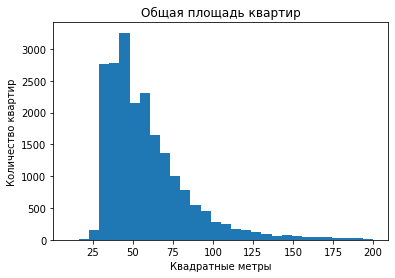

Недвижимость с наибольшей общей площадью:
14991    413.5
8822     398.0
5042     380.0
21990    373.1
19961    365.0
10569    347.5
20820    342.0
16179    336.0
14591    327.2
11087    320.0
Name: total_area, dtype: float64


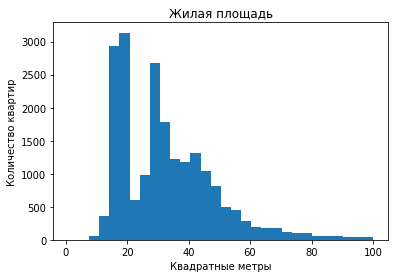

Недвижимость с наибольшей жилой площадью:
10246    200.0
13397    199.0
5042     198.0
6728     195.0
7939     194.0
4199     193.5
7694     193.0
11087    190.0
1188     188.7
20820    187.0
Name: living_area, dtype: float64


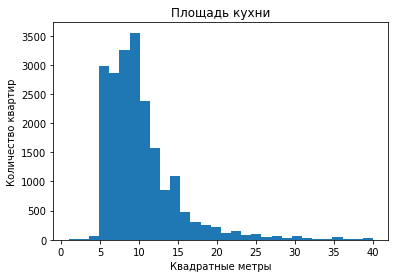

Недвижимость с наибольшей площадью кухни:
656      50.0
511      50.0
19267    50.0
51       50.0
2356     50.0
21923    50.0
10001    50.0
5135     50.0
5042     50.0
21331    49.4
Name: kitchen_area, dtype: float64


In [21]:
# Гистограмма по общей площади объектов недвижимости:
plt.hist(data['total_area'], bins=30, range=(10, 200))
plt.title('Общая площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print('Недвижимость с наибольшей общей площадью:')
print(data['total_area'].sort_values(ascending=False).head(10))

# Гистограмма по жилой площади объектов недвижимости:
plt.hist(data['living_area'], bins=30, range=(1, 100))
plt.title('Жилая площадь')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print('Недвижимость с наибольшей жилой площадью:')
print(data['living_area'].sort_values(ascending=False).head(10))

# Гистограмма по площади кухни:
plt.hist(data['kitchen_area'], bins=30, range=(1, 40))
plt.title('Площадь кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print('Недвижимость с наибольшей площадью кухни:')
print(data['kitchen_area'].sort_values(ascending=False).head(10))

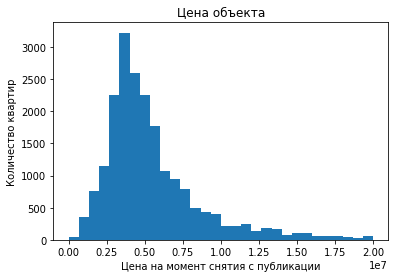

Квартиры с наибольшей ценой:
1436     330000000
22831    289238400
16461    245000000
8900     190870000
19155    160000000
2536     159984000
16495    159000000
22229    148000000
13864    130000000
1928     125000000
Name: last_price, dtype: int32


In [22]:
# Гистограмма по стоимости объектов недвижимости:
plt.hist(data['last_price'], bins=30, range=(10, 20000000))
plt.title('Цена объекта')
plt.xlabel('Цена на момент снятия с публикации')
plt.ylabel('Количество квартир')
plt.show()
print('Квартиры с наибольшей ценой:')
print(data['last_price'].sort_values(ascending=False).head(10))

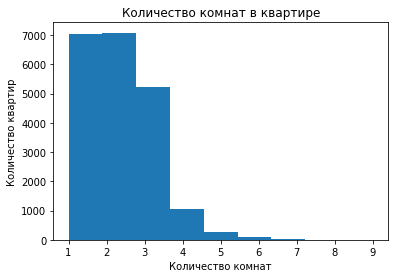

Размещения объявлений по количеству комнат в объекте недвижимости:
rooms
1    7056
2    7084
3    5229
4    1045
5     267
6      92
7      39
8       8
9       5
Name: rooms, dtype: int64


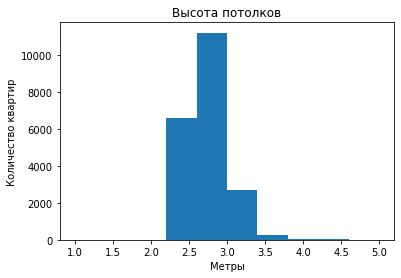

Недвижимость с наибольшей высотой потолков:
22869    10.0
5863      8.3
15743     8.0
3474      8.0
20264     6.0
7578      5.5
464       5.2
21923     4.9
2802      4.8
19142     4.7
Name: ceiling_height, dtype: float64


In [23]:
# Гистограмма по количеству комнат в квартире:
plt.hist(data['rooms'], bins=9, range=(1, 9))
plt.title('Количество комнат в квартире')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()
print('Размещения объявлений по количеству комнат в объекте недвижимости:')
print(data.groupby('rooms')['rooms'].count())

# Гистограмма по высоте потолков:
plt.hist(data['ceiling_height'], bins=10, range=(1, 5))
plt.title('Высота потолков')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()
print('Недвижимость с наибольшей высотой потолков:')
print(data['ceiling_height'].sort_values(ascending=False).head(10))

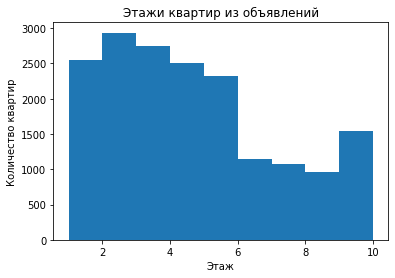

Распределение продаваемых квартир по этажам:
floor
1     2551
2     2935
3     2742
4     2510
5     2328
6     1143
7     1070
8      962
9      941
10     601
11     459
12     457
13     312
14     293
15     291
16     276
17     188
18     151
19     117
20      94
21     102
22      95
23      84
24      52
25      35
26      22
27       8
28       1
29       1
30       1
31       1
32       1
33       1
Name: floor, dtype: int64


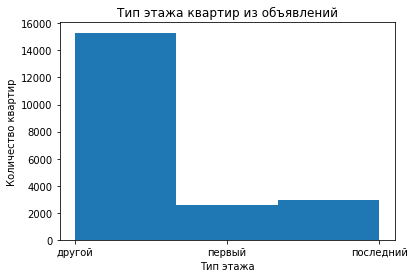

Распределение продаваемых квартир по типу этажей:
floor_type
другой       15306
первый        2551
последний     2968
Name: floor_type, dtype: int64


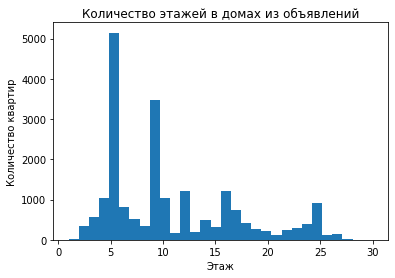

Распределение по общему количеству этажей в домах из объявлений:
floors_total
1       19
2      342
3      577
4     1029
5     5145
6      816
7      528
8      341
9     3461
10    1046
11     171
12    1221
13     199
14     494
15     311
16    1215
17     742
18     409
19     267
20     227
21     119
22     243
23     297
24     389
25     911
26     110
27     147
28      20
29       1
33       1
35      22
36       3
52       1
60       1
Name: floors_total, dtype: int64


In [24]:
# Гистограмма по этажу, на котором расположена квартира:
plt.hist(data['floor'], bins=9, range=(1, 10))
plt.title('Этажи квартир из объявлений')
plt.xlabel('Этаж')
plt.ylabel('Количество квартир')
plt.show()
print('Распределение продаваемых квартир по этажам:')
print(data.groupby('floor')['floor'].count())

# Гистограмма по типу этажа, на котором расположена квартира:
plt.hist(data['floor_type'], bins=3, range=(0, 2))
plt.title('Тип этажа квартир из объявлений')
plt.xlabel('Тип этажа')
plt.ylabel('Количество квартир')
plt.show()
print('Распределение продаваемых квартир по типу этажей:')
print(data.groupby('floor_type')['floor_type'].count())

# Гистограмма по общему количеству этажей в домах:
plt.hist(data['floors_total'], bins=30, range=(1, 30))
plt.title('Количество этажей в домах из объявлений')
plt.xlabel('Этаж')
plt.ylabel('Количество квартир')
plt.show()
print('Распределение по общему количеству этажей в домах из объявлений:')
print(data.groupby('floors_total')['floors_total'].count())

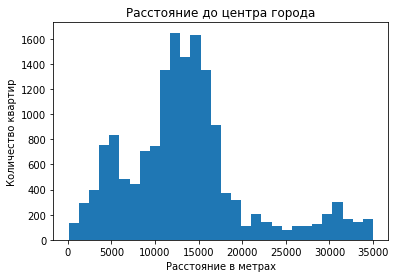

Наиболее близкие к центру объекты недвижимости:
13694    181.0
1182     208.0
8614     215.0
1934     287.0
20873    291.0
7726     318.0
13919    318.0
11492    318.0
1109     318.0
10377    318.0
Name: cityCenters_nearest, dtype: float64


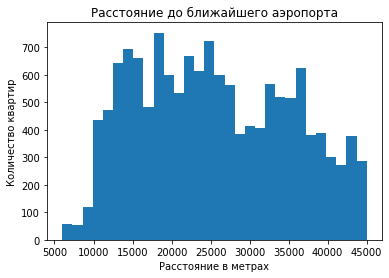

Квартиры, с наименьшим расстоянием до ближайшего аэропорта:
21085       0.0
4017     6450.0
12899    6450.0
7778     6914.0
23150    6949.0
22283    6989.0
5062     6989.0
11294    6989.0
15633    6989.0
10059    6989.0
Name: airports_nearest, dtype: float64


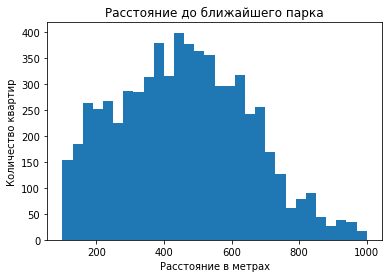

Квартиры, с наименьшим расстоянием до ближайшего парка:
14624     1.0
11949     3.0
9344      7.0
2527      9.0
189      10.0
19093    10.0
7788     10.0
214      10.0
21773    10.0
15296    10.0
Name: parks_nearest, dtype: float64


In [25]:
# Гистограмма по удаленности от центра города:
plt.hist(data['cityCenters_nearest'], bins=30, range=(100, 35000))
plt.title('Расстояние до центра города')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество квартир')
plt.show()
print('Наиболее близкие к центру объекты недвижимости:')
print(data['cityCenters_nearest'].sort_values(ascending=True).head(10))

# Гистограмма по расстоянию до ближайшего аэропорта:
plt.hist(data['airports_nearest'], bins=30, range=(6000, 45000))
plt.title('Расстояние до ближайшего аэропорта')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество квартир')
plt.show()
print('Квартиры, с наименьшим расстоянием до ближайшего аэропорта:')
print(data['airports_nearest'].sort_values(ascending=True).head(10))

# Гистограмма по расстоянию до ближайшего парка:
plt.hist(data['parks_nearest'], bins=30, range=(100, 1000))
plt.title('Расстояние до ближайшего парка')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество квартир')
plt.show()
print('Квартиры, с наименьшим расстоянием до ближайшего парка:')
print(data['parks_nearest'].sort_values(ascending=True).head(10))

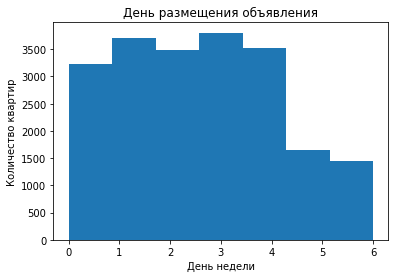

Размещения объявлений по дням недели:
weekday
0    3225
1    3698
2    3489
3    3801
4    3525
5    1648
6    1439
Name: weekday, dtype: int64


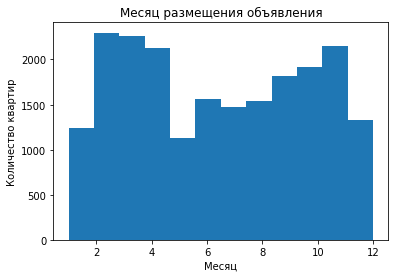

Размещения объявлений по месяцам:
month
1     1243
2     2297
3     2258
4     2123
5     1124
6     1557
7     1471
8     1538
9     1814
10    1919
11    2155
12    1326
Name: month, dtype: int64


In [26]:
# Гистограмма по дню размещения объявления:
plt.hist(data['weekday'], bins=7, range=(0, 6))
plt.title('День размещения объявления')
plt.xlabel('День недели')
plt.ylabel('Количество квартир')
plt.show()
print('Размещения объявлений по дням недели:')
print(data.groupby('weekday')['weekday'].count())

# Гистограмма по месяцу размещения объявления:
plt.hist(data['month'], bins=12, range=(1, 12))
plt.title('Месяц размещения объявления')
plt.xlabel('Месяц')
plt.ylabel('Количество квартир')
plt.show()
print('Размещения объявлений по месяцам:')
print(data.groupby('month')['month'].count())

**Рассмотрим значения в столбцах подробнее:**

* **Общая площадь квартир** - основная масса недвижимости в объявлениях имеет общую площадь 30-50 метров. Пик значений приходится именно на 50 метров.
* **Жилая площадь** - рассматривая показатели жилой площади, имеем 2 пика значений: 16-20 кв. метров и 30 кв. метров.
* **Площадь кухни** - средняя площадь кухни в рассматриваемой базе 5-10 кв. метров. Имеем явный тренд - чем больше размер кухни, тем меньше квартир в выборке.
* **Цена объекта** - на гистограмме виден один ярковыраженный пик на уровне 3,25 млн. руб.  
* **Количество вомнат в квартире** - среднее количество комнат в объявлениях из датафрейма - 1-2. Чуть реже встречаются трехкомнатные квартиры. Чем больше комнат, тем меньше вариантов. Также можно предположить, исходя из большого числа комнат, что часть объектов - не квартиры, а частные дома.
* **Высота потолков** - основная масса квартир имеет потолки высотой 2-3 метра, что вполне отражает текущие нормы строительства - от 2,5 до 4,5 метров. Конечно, встречаются и более высокие потолки, но тут тоже можно сделать предположение, что это частные дома с индивидуальной планировкой.
* **Этажи объектов из объявлений** - как видно из гистограммы, большинство квартир расположены на 2-5 этажах. Заметно сильное падение (в 2 раза) количества квартир, расположенных на 6 и более этажах. Возможно это связано стем, что продается в основном старый фонд (хрущевки), высотой именно 5 этажей.
* **Тип этажа квартиры** - как и было логично предположить, большая часть объектов расположена не на первом или последнем этаже дома. Доля тех, что расположены на первом или последнем этаже составляет примерно по 25% от тех, что попали в категорию "другие".
* **Общее количество этажей в доме** - на гистограмме четко видны 2 пика - 5 и 9 этажей. Это, скорее всего, связано опять же с тем, что активно продается вторичное жилье, те самые советкие пяти и девятиэтажки.
* **Расстояние до центра города** - в среднем, объекты из объявлений в датафрейме расположены в границе 12,5-17,5 км. НАиболее приближенная к центру квартира - расположена в 181 метре. 
* **Расстояние до ближайшего аэропорта** - довольно хаотичная гистограмма не имеющая системности. В основном это связано со множеством объектов, к которым можно привязаться. Так, например, насколько мне известно, основной аэропорт Ленинградской области - Пулково. Было бы логично, как и в случае с центром города, опираться именно на него. В противном случае, близость к аэропорту фактор довольно условный. Его можно рассматривать как минусом (шум от турбин самолетов), так и плюсом (экономия времени при частых перелетах).
* **Расстояние до ближайшего парка** - тоже фактор довольно специфический, но в отличие от аэропорта, важен сам факт наличия парка, а не привязка к конкретному объекту. Основная доля квартир расположена в пределах 200-700 метров от ближайшего парка. Пик значений - на уровне 500 метров.
* **День размещения объявления** - сразу бросается в глаза уменьшение количества размещений объявлений о продаже недвижимости в субботу и воскресенье. Скорее всего это связано с тем, что в выходные дни, люди менее активны и стараются сделать важные дела в будние. 
* **Месяц размещения объявления** - прослеживается сезонность в объемах размещаемых объявлений. Пользователи активнее выставляют объекты на продажу весной (с марта по май) и осенью (сентябрь-ноябрь). Летом количество размещений заметно проседает, что может быть, главным образом, связано с сезоном отпусков. Также видно падение в период с декабря по январь, тут тоже не маловажный фактор - выходные дни в новогодние праздники.



**Как быстро продавались квартиры:**

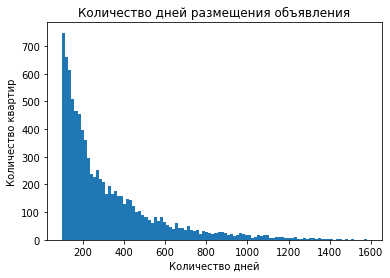

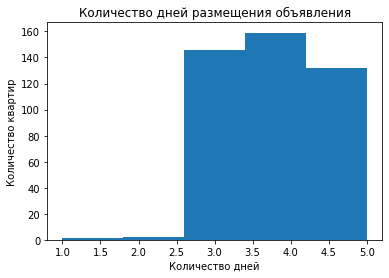

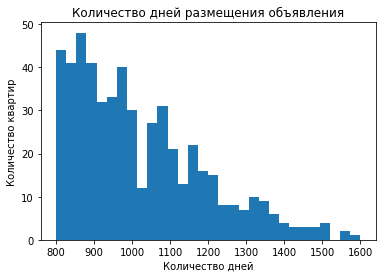

Максимальное количество дней: 1580.0
Минимальное количество дней: 1.0
Среднее значение: 185.11362370502394
Медианное значение: 102.0

count    17954.000000
mean       185.113624
std        221.527446
min          1.000000
25%         45.000000
50%        102.000000
75%        238.000000
max       1580.000000
Name: days_exposition, dtype: float64


In [27]:
# Гистограмма по столбцу days_exposition с количеством дней размещения объявления (от публикации до снятия), а также выведем минимальное и максимальное значение:
plt.hist(data['days_exposition'], bins=100, range=(100, 1580))
plt.title('Количество дней размещения объявления')
plt.xlabel('Количество дней')
plt.ylabel('Количество квартир')
plt.show()

plt.hist(data['days_exposition'], bins=5, range=(1, 5))
plt.title('Количество дней размещения объявления')
plt.xlabel('Количество дней')
plt.ylabel('Количество квартир')
plt.show()

plt.hist(data['days_exposition'], bins=30, range=(800, 1600))
plt.title('Количество дней размещения объявления')
plt.xlabel('Количество дней')
plt.ylabel('Количество квартир')
plt.show()

print('Максимальное количество дней:', data['days_exposition'].max())
print('Минимальное количество дней:', data['days_exposition'].min())

# Среднеарифметическое значение и медиана:
print('Среднее значение:', data['days_exposition'].mean())
print('Медианное значение:', data['days_exposition'].median())
print()
print(data['days_exposition'].describe())

* **Если рассмотреть график более подробно, то можно было бы посчитать аномальными значения от 0 до 2 (включительно), уж слишком резкий перепад значений идет между 2 и 3.** *Да, такие быстрые продажи в жизни имеют место быть, однако в нашем случае их количество слишком мало и их удаление не должно было бы повлиять на ход исследования.*

* **Зайдя с противоположной стороны, уже проведя исследование до конца, ограничил бы дни размещения объявлений значениями 1200.** *Предположу, что причиной могло быть то, что пользователи, после продажи, просто забыли закрыть свое объявление и оно так и продолжало висеть. Альтернативной версией может быть сбой на сервисе и часть объявлений не изменила статус на закрытый.*

* В любом случае, если взять ранее рассчитанные среднее (181 день) и медиану (96 дней), то из-за выбивающихся значений рассматривать среднее было бы неправильно. **Предположил бы, что рационально было бы рассматривать средним сроком размещения объявления именно медианное значение. А как раз среднее значение (более 180 дней), как долгое.**

**Подитожим:**

Время размещения объявлений мы разделили на 5 условных категорий:

* **Очень быстрые** - до 30 дней
* **Быстрые** - от 31 до 60 дней
* **Средние** - от 61 до 180 дней
* **Долгие** - от 181 до 360 дней
* **Необычно долгие** - более 360 дней

При этом 3396 объявлений остались пустыми, в силу невозможности восстановить данные по сроку их размещения. Их выделили отдельной категорией **неопределено**.



**Факторы, имеющие наибольшее всего влияние на общую (полную) стоимость объекта:**

Проверим, зависит ли цена от:

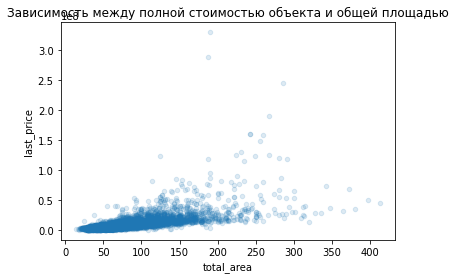

Коэффициент корреляции между полной стоимостью объекта и общей площадью: 0.6696929766997475


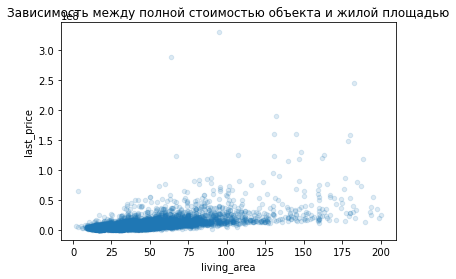

Коэффициент корреляции между полной стоимостью объекта и жилой площадью: 0.5895647878408606


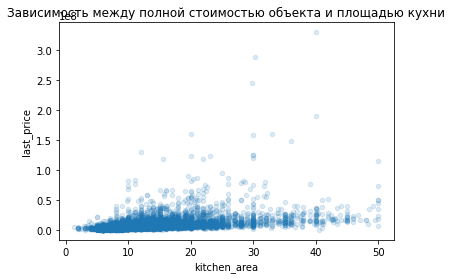

Коэффициент корреляции между полной стоимостью объекта и площадью кухни: 0.4890461767017618


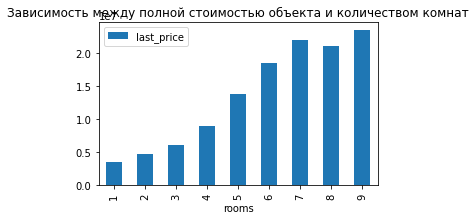

Коэффициент корреляции между полной стоимостью объекта и количеством комнат: 0.39924895342466515


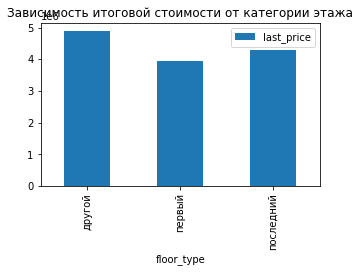

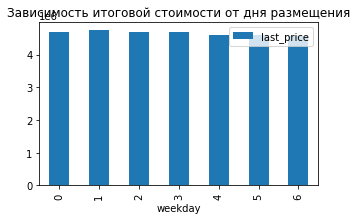

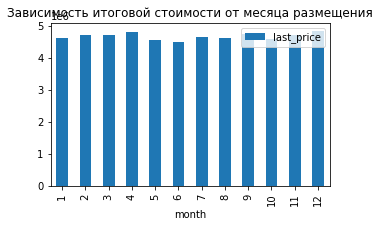

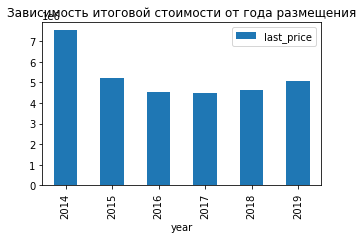

In [28]:
# Общей площади:
data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.15)
plt.title('Зависимость между полной стоимостью объекта и общей площадью')
plt.show()
print('Коэффициент корреляции между полной стоимостью объекта и общей площадью:', data['last_price'].corr(data['total_area']))

# Жилой площади:
data.plot(x='living_area', y='last_price', kind='scatter', alpha=0.15)
plt.title('Зависимость между полной стоимостью объекта и жилой площадью')
plt.show()
print('Коэффициент корреляции между полной стоимостью объекта и жилой площадью:', data['last_price'].corr(data['living_area']))

# Площади кухни:
data.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.15)
plt.title('Зависимость между полной стоимостью объекта и площадью кухни')
plt.show()
print('Коэффициент корреляции между полной стоимостью объекта и площадью кухни:', data['last_price'].corr(data['kitchen_area']))

# Количества комнат:
data.pivot_table(index='rooms', values='last_price', aggfunc=('median')).plot(y='last_price', kind='bar', figsize=(5,3))
plt.title('Зависимость между полной стоимостью объекта и количеством комнат')
plt.show()
print('Коэффициент корреляции между полной стоимостью объекта и количеством комнат:', data['last_price'].corr(data['rooms']))

# Типа этажа, на котором расположена квартира (первый, последний, другой):
data.pivot_table(index='floor_type', values='last_price', aggfunc=('median')).plot(y='last_price', kind='bar', figsize=(5,3))
plt.title('Зависимость итоговой стоимости от категории этажа')

# От дня размещения:
data.pivot_table(index='weekday', values='last_price', aggfunc=('median')).plot(y='last_price', kind='bar', figsize=(5,3))
plt.title('Зависимость итоговой стоимости от дня размещения')
plt.show()

# От месяца размещения:
data.pivot_table(index='month', values='last_price', aggfunc=('median')).plot(y='last_price', kind='bar', figsize=(5,3))
plt.title('Зависимость итоговой стоимости от месяца размещения')
plt.show()

# От года размещения:
data.pivot_table(index='year', values='last_price', aggfunc=('median')).plot(y='last_price', kind='bar', figsize=(5,3))
plt.title('Зависимость итоговой стоимости от года размещения')
plt.show()

**Рассмотрел зависимость итоговой цены от различных факторов подробнее:**

* В первую очередь, исследуем влияние факторов площади на итоговую цену недвижимости. Как видно из рассчитанных коэффициентов корреляции Пирсона, наибольшее действие оказывает фактор **общей площади - 0,64**. Чуть меньшее влияние у ** жилой площади - 0,57**. И еще меньше у **площади кухни - 0,50**. Смотря на все 3 фактора, видно, что параметры площади имеют заметное влияние на стоимость объектов недвижимости. Нельзя назвать ее высокой, но и низкой тоже не назовешь.
* Такой показатель как **количество комнат** имеет умеренное влияние на цену. Коэффициент корреляции Пирсона, равный 0,36, это подтверждает. Видно, что данный показатель менее важен при формировании цены, чем показатели площади обекта.
* Что касается **категории этажа**, то исходя из построенной столбчатой диаграммы (построенным по медианным значениям), видно заметное проседание в цене вариантов, расположенных на первых этажах. Впрочем последние этажи также проигрывают промежуточным.
* **День, месяц и год**, внимательно рассмотрев графики по каждому из этих факторов, становится очевидно, что они практически никак не влияют на итоговую цену. Единственное, что бросается в глаза - резкое падение цен после 2014 года, после чего они держатся примерно на одном уровне.


**Исследовал параметр средней цены квадратного метра:**

In [29]:
# средняя цену квадратного метра в населенных пунктах с наибольшим количеством объявлений:
locality_name_data = data.pivot_table(index='locality_name', values='cost_per_meter', aggfunc=['count', 'median']).sort_values(by=[('count', 'cost_per_meter')], ascending=False)
print(locality_name_data.head(10))
print()

# Населенные пункты с наибольшей и наименьшей ценой за квадратный метр недвижимости:
print('Населенный пункт с наибольшей ценой за квадратный метр:')
print(locality_name_data[locality_name_data[('median', 'cost_per_meter')] == locality_name_data[('median', 'cost_per_meter')].max()])
print()
print('Населенный пункт с наименьшей ценой за квадратный метр:')
print(locality_name_data[locality_name_data[('median', 'cost_per_meter')] == locality_name_data[('median', 'cost_per_meter')].min()])

                         count         median
                cost_per_meter cost_per_meter
locality_name                                
Санкт-Петербург          13962     104123.245
Мурино                     459      85582.260
Шушары                     392      77223.320
Кудрово                    376      95675.475
Всеволожск                 357      65789.470
Пушкин                     333     100000.000
Колпино                    322      74723.745
Гатчина                    290      67746.285
Парголово                  288      92271.975
Выборг                     190      58357.385

Населенный пункт с наибольшей ценой за квадратный метр:
                       count         median
              cost_per_meter cost_per_meter
locality_name                              
Репино                     2      127678.57

Населенный пункт с наименьшей ценой за квадратный метр:
                       count         median
              cost_per_meter cost_per_meter
locality_name           

**Исследовал объявления по объектам недвижимости в Санкт-Петербурге:**

                        last_price
cityCenters_nearest_km            
0.0                       13500000
1.0                       11500000
2.0                       10000000
3.0                        8375000
4.0                        9000000
5.0                        9000000
6.0                        8600000
7.0                        7600000
8.0                        7500000
9.0                        5400000
10.0                       5000000
11.0                       5000000
12.0                       5000000
13.0                       5200000
14.0                       4899000
15.0                       4900000
16.0                       4800000
17.0                       4600000
18.0                       4310000
19.0                       4500000
20.0                       5900000
21.0                       4910699
22.0                       4800000
23.0                       4590000
24.0                       3540000
25.0                       4085000
26.0                

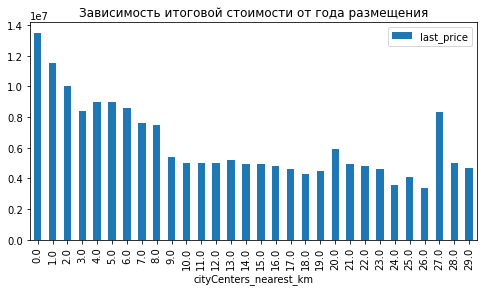

In [30]:
# Вывел недвижимость, находящуюся в Санкт-Петербурге, в отдельную переменную:
spb_data = data.query('locality_name == "Санкт-Петербург"').pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc='median')
print(spb_data)

# Для наглядности построил столбчатую диаграмму:
spb_data.plot(y='last_price', kind='bar', figsize=(8,4))
plt.title('Зависимость итоговой стоимости от удаленности к центру города')
plt.show()

**Общие закономерности ценообразования в Санкт-Петербурге:**

* Наиболее дорогая недвижимость, что логично, располагается в пределах 1 км от центра города. Медианное значение конечной цены - 17,5 млн
* Ко второй категории по стоимости следует отнести недвижимость, расположенную в пределах от 1 до 3 км. Цены на данном участке варьируются от 10 до 12 млн.
* Третья категория - участок в радиусе от 3 до 8 км. Диапазон медианных цен от 7,5 до 9,5 млн. Отдельно следует отметить значительное падение цен (-1,5 млн) между вторым и третьим км.
  
**Важно!** среди оставшихся значений выбивается уровень цен на 27м километре от центра города. Могу предположить, что там расположен какой-то элитный поселок с дорогой недвижимостью или дома/квартиры на береговой линии финского залива. Именно за счет этого медианная цена в данном радиусе соразмерна с ценами третьей категории.

* Остальные объявления, начиная с 9 км и дальшенаходятся примерно в одной ценовой категории 4-5 млн. Небольшой взлет на участке 20-21 км также может быть связан с расположенной на данном участке элитной недвижимостью.


**Общие выводы исследования:**
Было проведено исследование рынка недвижимости Санкт-Петербурга и ленинградской области периода 2014-2019 годо на основе данных сервиса "Яндекс.Недвижимость".


* **В ходе исследования были изучены изначальные данные, а также проведена их предварительная обработка, а именно:**
  - Заменили часть пропусков на подходящие по логике значения,
  - Проверили датафрейм на наличие строк-дубликатов,
  - Обработали аномальные значения.
  
  
* **В ходе работы были добавлены следущие столбцы:**
  - цена одного квадратного метра;
  - день недели публикации объявления;
  - месяц публикации объявления;
  - год публикации объявления;
  - тип этажа квартиры (значения — «первый», «последний», «другой»);
  - расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).
  
  
* **Были изучены основные параметры параметры квартир, что позволило сформировать образ среднестатистической квартиры в данном регионе:**
  - Общая площадь = 40 кв. метров
  - Жилая площадь = 20 кв. метров
  - Площадь кухни = 7,5 кв. метров
  - Итоговая стоимость = 3,25 млн
  - Количество комнат = 1-2
  - Высота потолков = 2,7 м
  - Этаж = 2-5(но не последний)
  - Количество этажей в доме = 5
  - Растояние до центра города = 15 км
  
  
* **Были изучены темпы продажи квартир:**
  - Среднее значение = 181 день
  - Медианнное = 96 дней
  
  *Объявления были разделены на 5 категорий:*
  - *Очень быстрые* - до 30 дней (**3661 объявлений**)
  - *Быстрые* - от 31 до 60 дней (**3830 объявлений**)
  - *Средние* - от 61 до 180 дней (**6286 объявлений**)
  - *Долгие* - от 181 до 360 дней (**3287 объявлений**)
  - *Необычно долгие* - более 360 дней (**3091 объявлений**)
  - Оббъявления без информации о сроке размещения были отнесены к категории - *неопределено* (**3197 объектов**)
   
   
* **Были изучены факторы, влияющие на итоговую стоимость недвижимости:** 
  - Среди таковых, по расчитанному коэффициенту корреляции Пирсона, выделяются параметры площади объекта (общая, жилая и кухонная) 0,64, 0,57 и 0,50, что может рассматриваться как заметное влияние, но не безусловное. 
  - Также, как показало дальнейшее исследование, сильное влияние на ценообразование имеет такой фактор как удаленность от центра города. 
  - Помимо этого, столбчатая диаграмма показала, что тип этажа также имеет значение. Недвижимость на первых и последних этажах стоит меньше, чем расположенная в промежутке между ними. 
  - Влияние даты размещения объявления (день недели, месяц ,год) приближено к нулю и фактически не влияет на цену.


* **Иследована стоимость квадратного метра в разных населенных пунктах**:
  - В ходе работы было выявлено, что наибольшее количество объектов недвижимости было расположено в Санкт-Петербурге (66% от общего числа объявлений, оставшихся после предобработки данных)
  - Помимо этого было определено, что наибольшая средняя стоимость квадратного метра недвижимости в Санкт-Петербурге (104650 за кв. метр). 
  - Наименьшая стоимость кв. метра принадлежит Старополью (11000 за кв. метр и всего 3 объявления)
  
  
* **Иследованы цены на недвижимость в Санкт-Петербурге. В частности зависимость цены от удаленности от центра:**
    Исследование показало, что Санкт-петербург можно разделить на 4 ценовых зоны:
    - До 1 км - центр города. Медианное значение конечной цены = 17,5 млн.
    - От 1 до 3 км - в шаговой доступности до центра города. Медианная цена 10-12 млн.
    - От 3 до 8 км - промежутоные варианты. Цена варьируется от 7,5 до 9,5 млн.
    - Более 8 км от центра города - спальные районы. Цена 4-5 млн